In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("review.csv")
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
data.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [6]:
data.shape

(8518, 8)

In [7]:
data.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [8]:
data.replace('',np.nan,inplace=True)

In [9]:
data.dropna(axis=0, how='any', inplace=True)

In [10]:
print(data.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [12]:
data['sentiment'] = np.where(data['Ratings'] == 5.0, 1,
                              np.where(data['Ratings'] == 4.0, 1, 0))

In [13]:
rating_sentiment_map = {5.0: 1, 4.0: 1, 1.0: 0, 2.0: 0, 3.0: 0}
data['sentiment'] = data['Ratings'].map(rating_sentiment_map)

In [14]:
data.head()


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,1


In [15]:
X = data["Review text"]
y = data["sentiment"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords

def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
X_train_cleaned = X_train.apply(clean_text)

In [20]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_words)

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
X_train_cleaned = X_train_cleaned.apply(lemmatize_text)
X_train_cleaned

4201                                          awesomeread
1585                                     good productread
1692       great product highly recommended practice read
5742                                    worst qualityread
8127                                 good value moneyread
                              ...                        
8406                  product good got best price fk read
5652                                             goodread
4440                                            superread
254     love really guudas well fantastic delivery ear...
5617                                             goodread
Name: Review text, Length: 6410, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# use it to extract features from cleaned training data
%time X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_cleaned)

print(X_train_tfidf.shape)

CPU times: total: 125 ms
Wall time: 132 ms
(6410, 2614)


In [24]:
X_test_cleaned = X_test.apply(clean_text)

# Apply lemmatization to the X_test_cleaned
X_test_cleaned = X_test_cleaned.apply(lemmatize_text)
X_test_cleaned

3350             bought flipkart totally bought priceread
2414                                         expectedread
6751                                             goodread
8367                                             niceread
5773                                         good nowread
                              ...                        
7639                 timely delivery product expectedread
2143                                             goodread
3564    good product quality practice shuttle work min...
2634                                             goodread
1359                                             niceread
Name: Review text, Length: 1603, dtype: object

In [25]:
%time X_test_tfidf = tfidf_vectorizer.fit_transform(X_test_cleaned)

print(X_test_tfidf.shape)

CPU times: total: 46.9 ms
Wall time: 35 ms
(1603, 1062)


In [26]:
from sklearn.naive_bayes import MultinomialNB

# Train the classifier
nb= MultinomialNB()
%time nb.fit(X_train_tfidf, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 4.13 ms


MultinomialNB()

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_train_pred = nb.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8897035881435258
f1_score: 0.8757718271824354
confusion matrix:
 [[ 599  645]
 [  62 5104]]


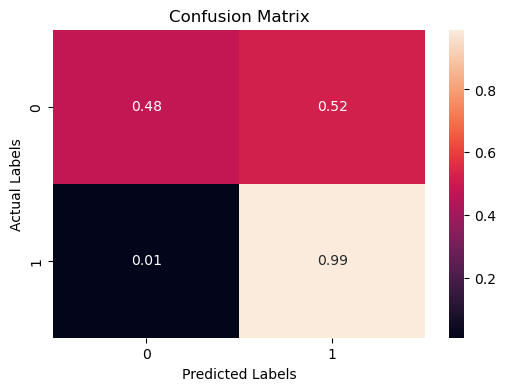

In [28]:
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [29]:

%time nb.fit(X_test_tfidf, y_test) 

CPU times: total: 15.6 ms
Wall time: 11.4 ms


MultinomialNB()

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = nb.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8895820336868372
f1_score: 0.8716879595436905
confusion matrix:
 [[ 133  174]
 [   3 1293]]


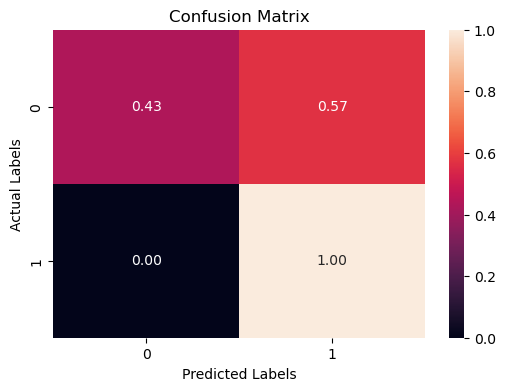

In [31]:
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [32]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(kernel='linear')

%time svm.fit(X_train_tfidf, y_train)

CPU times: total: 2.53 s
Wall time: 2.66 s


SVC(kernel='linear')

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = svm.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9151326053042121
f1_score: 0.9085442545320418
confusion matrix:
 [[ 771  473]
 [  71 5095]]


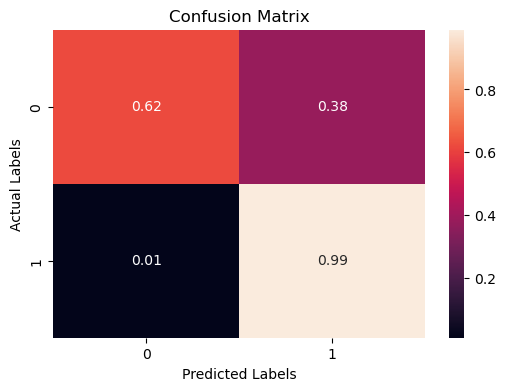

In [34]:
cm = confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [35]:
%time svm.fit(X_test_tfidf, y_test) 

CPU times: total: 156 ms
Wall time: 152 ms


SVC(kernel='linear')

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = svm.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9382407985028073
f1_score: 0.9345943310110413
confusion matrix:
 [[ 218   89]
 [  10 1286]]


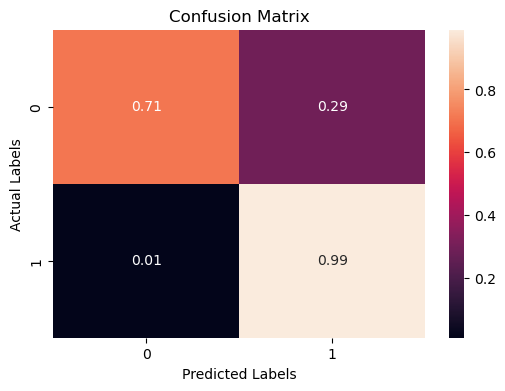

In [37]:
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lgr = LogisticRegression()

%time lgr.fit(X_train_tfidf, y_train)

CPU times: total: 156 ms
Wall time: 188 ms


LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = lgr.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8912636505460219
f1_score: 0.8780448090397912
confusion matrix:
 [[ 612  632]
 [  65 5101]]


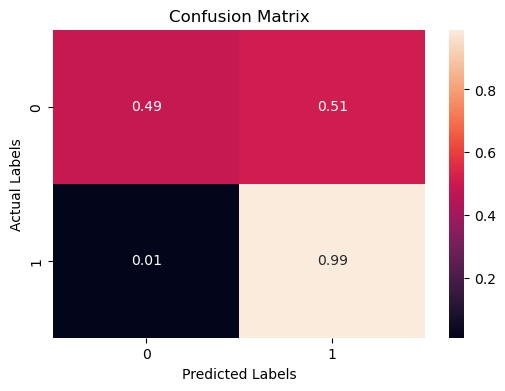

In [40]:
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [41]:
%time lgr.fit(X_test_tfidf, y_test)

CPU times: total: 46.9 ms
Wall time: 48.2 ms


LogisticRegression()

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = lgr.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8889582033686837
f1_score: 0.8720277764951078
confusion matrix:
 [[ 136  171]
 [   7 1289]]


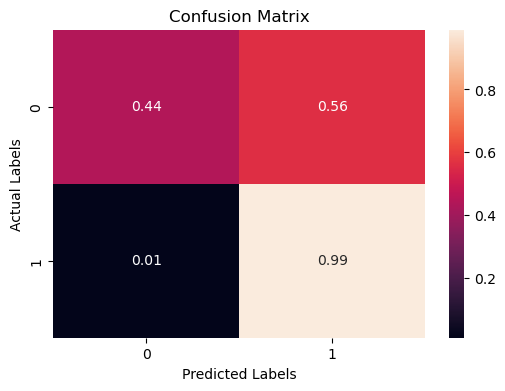

In [43]:
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
random_forest = RandomForestClassifier()

%time random_forest.fit(X_train_tfidf, y_train)

CPU times: total: 32.3 s
Wall time: 32.6 s


RandomForestClassifier()

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = random_forest.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.955226209048362
f1_score: 0.9538048279324172
confusion matrix:
 [[1007  237]
 [  50 5116]]


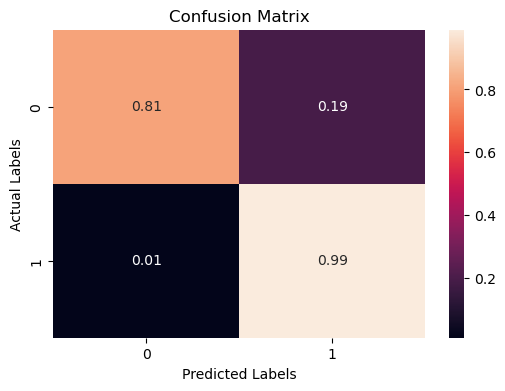

In [46]:
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [47]:
%time random_forest.fit(X_test_tfidf, y_test) 

CPU times: total: 5.31 s
Wall time: 5.37 s


RandomForestClassifier()

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = random_forest.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.966313162819713
f1_score: 0.9652941187314358
confusion matrix:
 [[ 258   49]
 [   5 1291]]


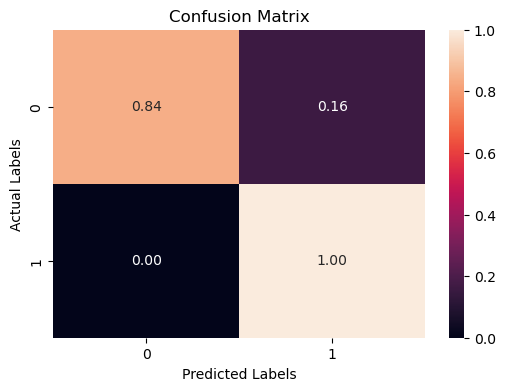

In [49]:
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kneighbors classifier
knn = KNeighborsClassifier()

%time knn.fit(X_train_tfidf, y_train)

CPU times: total: 0 ns
Wall time: 5.03 ms


KNeighborsClassifier()

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = knn.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)


# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8882995319812792
f1_score: 0.87713132219876
confusion matrix:
 [[ 641  603]
 [ 113 5053]]


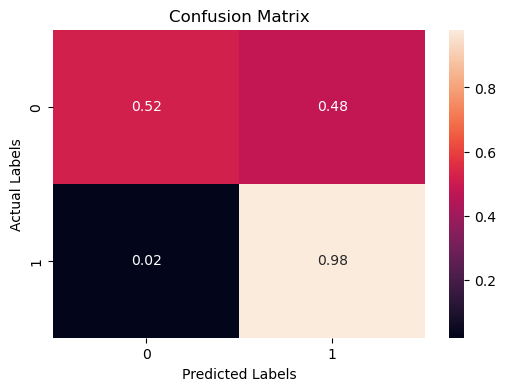

In [52]:
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [53]:
%time knn.fit(X_test_tfidf, y_test) 

CPU times: total: 15.6 ms
Wall time: 6.57 ms


KNeighborsClassifier()

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = knn.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8827199001871491
f1_score: 0.8660753445368536
confusion matrix:
 [[ 135  172]
 [  16 1280]]


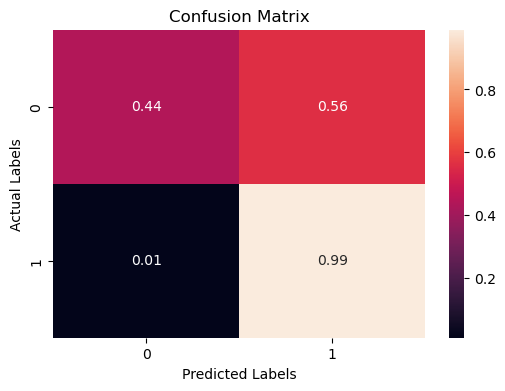

In [55]:
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [59]:
from joblib import dump

# Save the trained model as a .pkl file
dump(nb, 'C:/Users/Admin/OneDrive/Desktop/Pickle/MultinomialNB_model.pkl')

dump(svm, 'C:/Users/Admin/OneDrive/Desktop/Pickle/SVC_model.pkl')

dump(lgr, 'C:/Users/Admin/OneDrive/Desktop/Pickle/Logestic_Reggression_model.pkl')

dump(random_forest, 'C:/Users/Admin/OneDrive/Desktop/Pickle/Random_forest_model.pkl')

dump(knn, 'C:/Users/Admin/OneDrive/Desktop/Pickle/KNeighbors_model.pkl')

# Save the TF-IDF vectorizer as a .pkl file
dump(tfidf_vectorizer, 'C:/Users/Admin/OneDrive/Desktop/Pickle/tfidf_vectorizer.pkl')

['C:/Users/Admin/OneDrive/Desktop/Pickle/tfidf_vectorizer.pkl']

In [61]:
from joblib import load

# Load the Random Forest model from a .pkl file
random_forest_model = load('C:/Users/Admin/OneDrive/Desktop/Pickle/Random_forest_model.pkl')
def predict_sentiment(input_text):
    # Preprocess the input text
    preprocess_text = clean_text(input_text)

    preprocessed_text = lemmatize_text(preprocess_text)

    # Transform the preprocessed text into numerical features
    features = tfidf_vectorizer.transform([preprocessed_text])
    
    # Make prediction using the loaded random forest model
    prediction = random_forest_model.predict(features)[0]
    
    # Convert the prediction to human-readable format
    if prediction == 1:
        return "Positive"
    else:
        return "Negative"

# Example usage:
input_text ="nice product"
sentiment = predict_sentiment(input_text)
print("Sentiment:", sentiment)

Sentiment: Positive
